写在前面：文章里面的图片公式都是逆天一个个打出来画出来的，公式系列基本上都提供了源码

图片基本上不太加水印了，加了的也留了空间可以让你裁剪去水印，这样你引用也比较方便 ～ 

但是还是想说下：”**加个参考链接呗，逆天写作也不容易啊～**“

在线预览：<a href="http://github.lesschina.com/python/ai/math/数学基础.html" target="_blank">http://github.lesschina.com/python/ai/math/数学基础.html</a>

---

## 1.基础概念

线性代数研究的是什么内容？

1. 把2维世界转换成2维的世界
2. 把3维世界转换成2维的世界
3. 把2维世界转换成3维的世界

1维直线、2维平面（长宽）、3维空间（长宽高 | xyz轴）、4维时空（xyz轴+时间轴）

学习中主要就是学习`矩阵`、`向量`等，理解`线性映射`、`特征值`和`特征向量`等。

总结：**线性代数就是一门将M维世界与N维世界联系起来的学科**

### 1.1.数的分类

一开始人们用的数都是 **<a href="http://www.baike.com/wiki/自然数" target="_blank">自然数</a>** (0、1、2...)来计算

后来发现用小数减大数就没法计算了。eg：`1-2=?`

接着就引入了`负数`，然后常用的数就变成了 **<a href="http://www.baike.com/wiki/整数" target="_blank">整数</a>** 
 (正整数、0、负整数)，这样就可以快乐的`加减乘`运算

整数：
- 自然数
- 负数

---

后来发现，像`1/3=?`这类的不能整除了，于是就引入了`分数`，

这样数的界限又扩充了，就叫 **<a href="http://www.baike.com/wiki/有理数" target="_blank">有理数</a>** ，这样加减乘除都可以通过分数来表示了

有理数（分数）：
-  整数
    - 正整数
    - 0
    - 负整数

---

好景不长，之后求圆面积啥的，又发现了像`π、√3`这类的，没法用分数表示的数，

于是就又在原有基础上扩展了，加入了`无理数`，数的界限又扩展了==> **<a href="http://www.baike.com/wiki/实数" target="_blank">实数</a>**

实数（小数）：
1. 有理数（分数）
    -  整数
        - 正整数
        - 0
        - 负整数
    - 非整数的有理数
2. 无理数

---

这下总算可以了吧，可事实往往出乎意料，像二次曲线求解有无解的情况（曲线跟x轴不相交）

这太不科学了吧，然后就引入了 **`虚数`i** 的概念，并定义`i²=-1`，数的范围又扩大了，就叫 **<a href="http://www.baike.com/wiki/复数" target="_blank">复数</a>**

举个例子(**后面有推导**)：

$$x = {-b \pm \sqrt{b^2-4ac} \over 2a}$$

以前我们遇到：`x²+3=0`，因为判别式`b²-4ac<0` 所以方程无解（或者曲线画出来，看跟x轴有几个交点==>就说明有几个解）

其实我们中学学的这个无解，指的是**在实数范围内无解**

引入虚数后：**`x²+3=0`==> `x²-(-3)=0`，因为`i²=-1` ==> `(x+√3i)(x-√3i)=0` 有解了**

In [1]:
# 画个图看看曲线长什么样
import matplotlib.pyplot as plt

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[103, 84, 67, 52, 39, 28, 19, 12, 7, 4, 3, 4, 7, 12, 19, 28, 39, 52, 67, 84, 103]


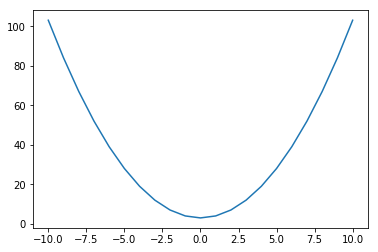

In [2]:
# 生成x和y的值
x_list = list(range(-10, 11))
y_list = [x**2 + 3 for x in x_list] # 2**3 ==> 8 **是Python里面的幂运算符

print(x_list)
print(y_list)

# 画图
plt.plot(x_list, y_list)
# 显示图片
plt.show()

综上所述，数可以分为：

复数：`z = a+bi，i² = -1`
1. 实数（虚部b=0）
    - 有理数
        1. 整数
            - 正整数：1、2、3
            - 0
            - 负整数：-1、-2、-3
        2. 非整数的有理数（[正负]分数）
            - [正负]有限小数：0.3 ==> (3/10)
            - [正负]循环小数：0.3333... (1/3)
    - 无理数
        - 无限不循环小数：π、√3
2. 虚数（虚部b!=0）
    -  纯虚数（虚部b!=0，且实部a=0）
    -  非纯虚数

---

### 扩展：二次方程`求解公式`的推导

这个应该是初中学的，很多学校教数学就让背公式，其实这样容易忘记（你好几年不接触数学公式还记得？）**会推导才是根本** ：

其实不仅仅是数学公式了，很多程序中的算法也是这样，都是需要推导的，不然只能用而不能深究，就更不提创新了。不扯了，进入正题：

$\mathbf{ax^2+bx+c=0（a\neq0)}$

要求x，那我们先两边同时除以a：

$\mathbf{x^2+\frac{b}{a}x+\frac{c}{a}=0}$

把和x没关系的常数移到等号另一边：

$\mathbf{x^2+\frac{b}{a}x=-\frac{c}{a}}$

看到左边就想到了 ==> $x^2+2ax+a^2$ 我们来凑一下：

$\mathbf{x^2+2*\frac{b}{2a}x+(\frac{b}{2a})^2=(\frac{b}{2a})^2-\frac{c}{a}}$

因为：$x^2+2ax+a^2=(x+a)^2$ 所以可以转换成：

$\mathbf{(x+\frac{b}{2a})^2=(\frac{b}{2a})^2-\frac{c}{a}}$

把右边化简一下：

$\mathbf{(x+\frac{b}{2a})^2=\frac{b^2}{4a^2}-\frac{4ac}{4a^2}=\frac{b^2-4ac}{4a^2}}$

去左边平方（右边开根号）：

$\mathbf{x+\frac{b}{2a}=\frac{ \pm \sqrt{b^2-4ac}}{2a}}$

把左边的常数移过去：

$\mathbf{x=\frac{-b \pm \sqrt{b^2-4ac}}{2a}}$

---

方便有需求的人，推导过程的源码贴一下：

```
$ax^2+bx+c=0（a\neq0)$

要求x，那我们先两边同时除以a：

$x^2+\frac{b}{a}x+\frac{c}{a}=0$

把和x没关系的常数移到等号另一边：

$x^2+\frac{b}{a}x=-\frac{c}{a}$

看到左边就想到了 ==> $x^2+2ax+a^2$ 我们来凑一下：

$x^2+2*\frac{b}{2a}x+(\frac{b}{2a})^2=(\frac{b}{2a})^2-\frac{c}{a}$

因为：$x^2+2ax+a^2=(x+a)^2$ 所以可以转换成：

$(x+\frac{b}{2a})^2=(\frac{b}{2a})^2-\frac{c}{a}$

把右边化简一下：

$(x+\frac{b}{2a})^2=\frac{b^2}{4a^2}-\frac{4ac}{4a^2}=\frac{b^2-4ac}{4a^2}$

去左边平方（右边开根号）：

$x+\frac{b}{2a}=\frac{ \pm \sqrt{b^2-4ac}}{2a}$

把左边的常数移过去：

$x=\frac{-b \pm \sqrt{b^2-4ac}}{2a}$
```

---

### 1.2.命题相关

命题中学阶段就接触了，我们来先说说**<a href="http://www.baike.com/wiki/命题" target="_blank">命题</a>** ：**可以判断真假的语句叫做命题**

比如：`小明是个男的`，这个不管对错肯定有个确定的答案

再比如：`小明是活泼好学的孩子`，这个就不一定了，公说公有理婆说婆有理，**这种结果模糊不确定的就不是命题**

---

**充分条件和必要条件**

这个时间长了容易混淆，举个例子：`小明是人类`，`人类是小明`

通过小明肯定能推出他是个人，这个就叫**必要条件**

人就一定是小明吗？不一定吧 ==> 这个就是**充分条件**

**如果P成立，Q就成立是真命题时，就可以表示为：`P=>Q`** （由P肯定能推导出Q）（eg：`小明=>人`）:
1. `P是Q的必要条件`
2. `Q是P的充分条件`

---

**充分必要条件**：

如果`P=>Q`，而且`Q=>P`，那么：
1. `P是Q的充分必要条件`
2. `Q是P的充分必要条件`

表示为：**`P<=>Q`** 

---

### 1.3.集合系列

集合应该是刚上高中那会教的内容，我们来看看：

**<a href="https://baike.baidu.com/item/集合" target="_blank">集合</a>** （Python里面用 **<a href="https://www.cnblogs.com/dotnetcrazy/p/9155310.html#7.集合Set" target="_blank">set</a>** 来表示）：**某种特定性质的对象，汇总成的集体**(`
人以类聚,物以群分`) **这些对象称为该集合的元素**。

集合中的元素有三个特征：
1. 确定性（集合中的元素必须是确定的）
2. 互异性（集合中的元素互不相同）eg：集合A={1，a}，则a不能等于1）
3. 无序性（集合中的元素没有先后之分）eg：集合{3,4,5}和{3,5,4}是同一个集合

**表示方式**，eg：10以内的偶数：
1. `X = {0, 2, 4, 6, 8}`
2. `X = {2n | n = 0, 1, 2, 3, 4}`

当x是X集合里面的元素时，可以表示为：**`x ∈ X`** eg:`2 ∈ X`

In [3]:
# Python3 Code
X = set([x for x in range(10) if x%2==0])

print(X)

{0, 2, 4, 6, 8}


In [4]:
# 当x是X集合里面的元素时，可以表示为：x ∈ X
# eg:2 ∈ X
2 in X

True

**<a href="https://baike.baidu.com/item/子集" target="_blank">子集</a>** ：当一个集合A里面所有元素都属于集合B时，称A是B的子集。即：**`A ⊆ B`**

eg：集合A：{1,2,3} 集合B：{1,2,3,4} ==> `A ⊆ B`

如果两个集合A和B的元素完全相同，则称A与B两个集合相等，记为 **`A=B`**：

集合A：{1,2,3,4} 集合B：{1,2,3,4} ==> `A ⊆ B` and `B ⊆ A` ==> `A = B`

---

**<a href="https://baike.baidu.com/item/真子集" target="_blank">真子集</a>** ：如果集合A是集合B的子集`A ⊆ B`，并且集合B中至少有一个元素x∉A，那么集合A叫做集合B的真子集

简单讲：`如果A包含于B,且A不等于B,就说集合A是集合B的真子集`（**`A有的B全有，B有的A不一定有`**）

>如果集合A中任意一个元素都是集合B中的元素，我们就说这两个集合有包含关系，称集合A为集合B的子集。可知任一集合A是自身的子集，空集是任一集合的子集。真子集就是一个集合中的元素全部是另一个集合中的元素，但不存在相等。所有亚洲国家组成的集合是地球上所有国家组成的集合的真子集；所有自然数的集合是所有整数的集合的真子集。

In [5]:
A = set([1,2,3])
B = set([1,2,3,4])

print(A)
print(B)

{1, 2, 3}
{1, 2, 3, 4}


In [6]:
# 子集（判断A是否是B的子集）
A.issubset(B)

True

In [7]:
# 父集（B是否是A的父集）
B.issuperset(A)

True

In [8]:
A = B

A.issubset(B)

True

**<a href="https://baike.baidu.com/item/并集" target="_blank">并集</a>** ：由所有属于集合A或属于集合B的元素所组成的集合，读作“A并B”（或“B并A”）**并集越并越多，而且没有重复元素**。

记作`A∪B` or `B∪A`，即 **`A∪B={x|x∈A,或x∈B}`**

---

**<a href="https://baike.baidu.com/item/交集" target="_blank">交集</a>** ：由属于A且属于B的相同元素组成的集合，读作“A交B”（或“B交A”）**交集越交越少**。

记作`A∩B` or `B∩A`，即 **`A∩B={x|x∈A,且x∈B}`**

**若A包含B，则`A∩B=B，A∪B=A`**

---

**<a href="http://www.baike.com/wiki/差集" target="_blank">差集</a>** ：A，B是两个集合，所有x∈A且x∉B的元素构成的集合，叫做集合A减集合B（或集合A与集合B之差）

类似地，对于集合A、B，我们把集合 **`A-B={x∣x∈A,且x∉B}`** 叫做A与B的差集（`把B中元素从A中减去`）

---

**<a href="https://baike.baidu.com/item/补集" target="_blank">补集</a>** ：一般指绝对补集，即一般地，设S是一个集合，**A是S的一个子集（S包含于A）**（`大前提`），由S中所有不属于A的元素组成的集合，叫做子集A在S中的绝对补集。

扩展：在集合论和数学的其他分支中，存在补集的两种定义：相对补集和绝对补集

In [9]:
set1=set([1,2,5])
set2=set([2,4,6])

print(set1)
print(set2)

{1, 2, 5}
{2, 4, 6}


In [10]:
# 交集 A∩B={x|x∈A,且x∈B}
set1 & set2

{2}

In [11]:
# 并集 A∪B={x|x∈A,或x∈B}
set1 | set2

{1, 2, 4, 5, 6}

In [12]:
# 差集 A-B={x∣x∈A,且x∉B}
set1 - set2

{1, 5}

In [13]:
set3=set(list(range(10)))

print(set3)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [14]:
# 【大前提】set2是set3的一个子集（set3包含于set2）
set2.issubset(set3)

True

In [15]:
# 这时候求差集，就等于求补集
set3 - set2

{0, 1, 3, 5, 7, 8, 9}

### 1.4.映射系列（映射、像、定义域和值域、满单射、双射、逆映射、线性映射等）

这个系列应该是高一的知识

#### 1.<a href="https://baike.baidu.com/item/映射" target="_blank">映射与像</a> ：

设A,B是两个非空的集合，如果按某一个确定的对应关系f，使对于集合A中的任意一个元素`x`，在集合B中都有唯一的元素`y`与之对应，那么就称对应的规则`f` 为从集合A到集合B的**`映射`** 一般这样表示：`f：A → B`。其中，`y`称为元素`x`在映射`f`下的 **`像`** ，记作：`y=f(x)`。



通俗讲：

**把使集合A的元素与集合B的元素相对应的`规则`叫做 `“集合A到集合B的映射”` **

**如果从A集合中取元素`x`，通过`f`得到其对应B集合的元素`y`。这个新的元素就叫做：“`x通过映射f形成的像`”**

`像`这个说的还是有点抽象，举个简单的例子：

高中的时候经常做这样的练习：**`f(x)=2x+1`**

用映射来解释就是：“**映射 `f` 是使集合B的元素 `2x+1` 与集合A的元素 `x` 相对应的规则**”
![映射图示](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711145742135-74288237.png)
再解释**像**就简单了：**`f(2)`**

`x=2` 通过 `f` 形成的像是 `2*2+1`
![像图示](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711150336730-1654831236.png)

#### 2.值域和定义域：

我们把映像`f`产生的值组成一个集合`{f(0)、f(1)、f(2)...}`，这个集合就叫做“**映像`f`的值域**”。

而`x`值组成的集合 `{0、1、2...}` 就叫做“**映像`f`的定义域**”。

**这个值域的集合往往是集合B的子集**：$\lbrace f(x_1)，f(x_2)...f(x_n)\rbrace \subseteq B$


比如说：`f(x)=2x+1` 定义域A{0、1、2、3}，那么求出来的值域是：{1、3、5、7}，而B集合是{1、3、5、7、8}
![定义域和值域](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711153954177-152146115.png)

#### 3.满射、单射、双射：

**<a href="https://baike.baidu.com/item/满射" target="_blank">满射</a>：如果值域任何元素都有至少有一个变量与之对应，那这个映射就叫做满射**。

来个示意图：f(x)=x$^2$
![满射示意图](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711161917683-932754493.png)
其实老版本的教科书还有一种说法叫做：”**当映射f的值域等于集合B时，f为`满射`**“

---

**<a href="https://baike.baidu.com/item/单射" target="_blank">单射</a>：设f是由集合A到集合B的映射，如果所有x,y∈A,且x≠y，都有f(x)≠f(y),则称f为由A到B的`单射`**（函数f被称为是单射时，对每一值域内的y，存在至多一个定义域内的x使得f(x) = y）

来个图示：（两种情况都是）
![单射图示](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711163519615-1666035045.png)

---

**<a href="https://baike.baidu.com/item/双射" target="_blank">双射</a>** (一一映射)：**既是单射又是满射的映射称为`双射`**

图示：（偷个懒，拿上面的图片改改）
![双射图示](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711164612268-1422704882.png)

#### 4.逆映射：

这次先不定义，先看个图：
![逆映射图示](https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711170201060-242638929.png)

看完图基本上懂了（**映射`g`就是映射`f`的逆映射**），现在来定义一下：

**<a href="https://baike.baidu.com/item/逆映射" target="_blank">逆映射</a>** :

**当f是双射**（一一对应的单射）并且**映射`f`和映射`g`满足：**
1. **g(f(x))=x**
2. **f(g(x))=x**

**那么映射`g`就是映射`f`的逆映射**，表示方式：$f^{-1}:B\rightarrow A$

#### 5.线性映射

后面说线性回归之类的代码和数学知识时会讲，这边因为也是属于映射内容，所以简单提一下定义：

假设 $x_1$ 和 $x_2$ 是属于A集合中的任意元素，**`c`** 为任意实数，**`f`** 为从A到B的映射。

当映射`f`满足以下两个条件：
1. $f(x_1)+f(x_2)=f(x_1+x_2)$
2. $cf(x_1)=f(cx_1)$

那么映射`f`就是从A到B的**线性映射**

举个例子：`f(x)=x` 验证一下：是线性映射

$f(x_1)+f(x_2)=x_1+x_2=f(x_1+x_2)$

$cf(x_1)=cx_1=f(cx_1)$

再测试一个不是的：`f(x)=x+1` 验证一下：

$f(x_1)+f(x_2)=x_1+x_2+2$

$f(x_1+x_2)=x_1+x_2+1$

$f(x_1)+f(x_2)\neq f(x_1+x_2)$

后面都不用验证了，不是线性映射

### 1.5.排列组合

这个应该是高二的时候学的，简单提一下

**<a href="http://www.baike.com/wiki/排列组合" target="_blank">排列组合</a>** ：

1. 排列：**从给定个数的元素中取出指定个数的元素进行排序**
2. 组合：**从给定个数的元素中仅仅取出指定个数的元素，不考虑排序**

通俗讲：

**组合个数**：“从`n`个中挑出`r`个的个数” 一般用 $C^r_n$ 来表示(n>=r)

$\Large {C^r_n=\frac{n!}{r!(n-r)!}}$

**排列个数**：“从`n`个中挑出`r`个的个数，然后再把选好的r个事物按照顺序排列的种数” 一般用 $P^r_n$ 来表示(n>=r)

$\Large {A^r_n=r!C^r_n=\frac{n!}{(n-r)!}}$

---

如果还抽象的话，我们来看个案例：

**小明请小潘和小张一起去食堂吃饭，食堂今天总共有5个菜**

1.试问，他们**从5个菜中选出3个不同的菜**，有几种可能性？


假设有A、B、C、D、E这5个菜，那选出3个有如下组合(不管顺序)：

| 列举 | 列举 | 列举 | 列举 | 列举 | 列举 |
| ---- | ---- | ---- | ---- | ---- | ---- |
| ABC  | ABD  | ABE  | ACD  | ACE  | ADE  |
|      |      |      | BCD  | BCE  | BDE  |
|      |      |      |      |      | CDE  |

$\large {C^3_5=\frac{5!}{3!(5-3)!}=\frac{5×4×3×2×1}{3×2×1×2×1}=10}$

---

2.试问，选出的这**3个菜有几种排放顺序**？

假设选出的是A、B、C这3个菜，那它的排序有几种可能：

| 序号 | 列举 | 列举 |
| ---- | ---- | ---- |
| A    | ABC  | ACB  |
| B    | BAC  | BCA  |
| C    | CAB  | CBA  |

其实无论选择哪3种，他们的排序都是6种，3!=3×2×1=6

简单分析一下：

第一道菜可以在已经选好的菜里面选1个，那就是3种可能

第二道菜可以在剩下的2道菜中选1个，那就是2种可能（第一道刚才选好了，已经算确定的了）

第三道菜不用选了，因为现在只剩下1道了，那就是1种可能

所以有 3×2×1种可能==>3!=6种可能

---

3.试问，**从5个菜中选出3个不同的菜，并按顺序打包**带走总共有多少种可能？

排列的个数其实就是：**`5选3组合个数 × 3道菜可能的排序`** = 10 × 6 =60

$\large {A^3_5=\frac{5!}{(5-3)!}=\frac{5×4×3×2×1}{2×1}=60}$

简单分析推导一下：

第一个菜可以在5道菜里面选一个，那就是5种可能

第二道菜可以在剩下的4道菜里面选一个，那就是4种可能

第三道菜可以在剩下的3道菜里面选一个，那就是3种可能

那总共可能性就是：5×4×3=60种可能性，和上面公式计算一样结果

---

排列、组合、二项式定理公式口诀：
```
加法乘法两原理，贯穿始终的法则。与序无关是组合，要求有序是排列。

两个公式两性质，两种思想和方法。归纳出排列组合，应用问题须转化。

排列组合在一起，先选后排是常理。特殊元素和位置，首先注意多考虑。

不重不漏多思考，捆绑插空是技巧。排列组合恒等式，定义证明建模试。

关于二项式定理，中国杨辉三角形。两条性质两公式，函数赋值变换式。
```

### 1.5.高中函数附录

以前在网上找的资料，你们有更好的可以贴一下（<a href="https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711145233865-73813447.jpg" target="_blank">点我查看</a>）

### 1.6.高中数学公式

以前在网上找的资料，你们有更好的可以贴一下（<a href="https://images2018.cnblogs.com/blog/1127869/201807/1127869-20180711145259237-1641669287.jpg" target="_blank">点我查看</a>）

## 2.矩阵预告

**下次和Numpy一起讲，这样才会～数学不枯燥，代码不空洞**